### tqdm 顯示進度條工具


In [3]:
from tqdm import tqdm,tqdm_notebook, tnrange
from time import sleep
epochs = 10
for i in tqdm_notebook(range(epochs),desc='1st loop'):
    sleep(0.01)
    

In [1]:
# argmax
import numpy as np
a = np.arange(12).reshape(3,4) + 10
print(a)
#找出最大值的index, 這裏為最後一個也就是第11個元素
print(np.argmax(a))
#找出直向最大值的index, 這裡是最後一列
print(np.argmax(a, axis=0))
#找出橫向最大值的index, 這裡是最後一行
print(np.argmax(a, axis=1))

[[10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]]
11
[2 2 2 2]
[3 3 3]


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

tf.reset_default_graph() 
pprint(tf.global_variables())
#init = tf.global_variables_initializer()

digits = load_digits()
x_, y_ = digits.data, digits.target

# min-max normalization
# scale到0~1之間
x_ = x_ / x_.max() 
# one hot encoding
#數字0~9, 10的0再對第i位填1即可
y_one_hot = np.zeros((len(y_), 10))  
y_one_hot[np.arange(len(y_)), y_] = 1

#分成x_train有1707個 跟x_test有90個
# stratify表示分佈依y_保持一致
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y_)

train_ratio = 0.9
# 拿x_train再切分成train跟valid部分
# 這裏用y_train.argmax(axis=1)當作分佈
x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size=1.0 - train_ratio,
                                                      stratify=y_train.argmax(axis=1))


print("training set data dimension")
print(x_train.shape)
print(y_train.shape)
print("-----------")
print("training set: {}".format(len(x_train)))
print("validation set: {}".format(len(x_valid)))
print("testing set: {}".format(len(x_test)))

[]
training set data dimension
(1536, 64)
(1536, 10)
-----------
training set: 1536
validation set: 171
testing set: 90


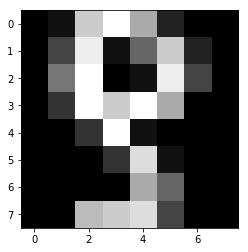

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
plt.imshow(x_train[0].reshape(8, 8), cmap='gray')
plt.show()
print(y_train[0])

In [46]:
# build the graph
tf.reset_default_graph()

lr = 0.01

with tf.name_scope('input'):
    # None表示不指定維度, 輸入64維, 輸出10維
    x_input = tf.placeholder(shape=(None, 64), name='x_input', dtype=tf.float32)
    y_out = tf.placeholder(shape=(None, 10), name='y_label', dtype=tf.float32)

with tf.variable_scope('hidden_layer'):
    # 從截斷的常態分佈中隨機輸出64x25的值
    w1 = tf.Variable(tf.truncated_normal(shape=[64, 25], mean=0.0 ,stddev=0.1),name='weight1',dtype=tf.float32)
    # bias1維度25
    b1 = tf.Variable(tf.constant(0.0, shape=[25]),name='bias1', dtype=tf.float32)
    # 矩陣運算
    z1 = tf.add(tf.matmul(x_input, w1), b1)  # (None, 64)×(64, 25)+(None, 25) = (None, 25)
    # 激發函數使用relu
    a1 = tf.nn.relu(z1, name='h1_out')

with tf.variable_scope('output_layer'):
    w2 = tf.Variable(tf.truncated_normal(shape=[25, 10], mean=0.0,stddev=0.1),name='weight2',dtype=tf.float32)
    b2 = tf.Variable(tf.constant(0.0, shape=[10]),name='bias2', dtype=tf.float32)
    output = tf.add(tf.matmul(a1, w2), b2, name='output')

with tf.name_scope('cross_entropy'):
    # 使用softmax_cross_entropy_with_logits_v2(logits, labels)
    # 其中logits是計算出來的y_pred, labels是placeholder的真實y_true
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y_out), name='loss')

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)


init = tf.global_variables_initializer() 
tf.global_variables()

[<tf.Variable 'hidden_layer/weight1:0' shape=(64, 25) dtype=float32_ref>,
 <tf.Variable 'hidden_layer/bias1:0' shape=(25,) dtype=float32_ref>,
 <tf.Variable 'output_layer/weight2:0' shape=(25, 10) dtype=float32_ref>,
 <tf.Variable 'output_layer/bias2:0' shape=(10,) dtype=float32_ref>]

In [12]:
from tqdm import tqdm,tqdm_notebook, tnrange
from time import sleep
epochs = 100
pbar = tqdm(["a", "b", "c", "d"])
print('--- training start ---')
sess = tf.Session()
    
sess.run(tf.global_variables_initializer())
for i in tqdm_notebook(range(epochs),desc='1st loop'):
    for j in tnrange(100, desc='2nd loop', leave=False):
        sleep(0.01)

sess.close()
print('--- training done ---')

  0%|          | 0/4 [00:00<?, ?it/s]

--- training start ---


ImportError: IntProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html